# Bayesian Inference


To get our baseline inferences, we should find the probablities of of each combination of cards.

In [14]:
import random
import math
# Baye's Theorem
# P(A|B) = P(B|A)*P(A) / P(B)

SUITS = 4
TOTAL_CARDS = 40
HAND = 10
COMMON_CARDS = 12
COMMON_SUIT = "Spades"
CARDS_REMAINING = TOTAL_CARDS - COMMON_CARDS
PROBABILITY_COMMON = 1/SUITS

In [27]:
def compute_probabilities_range(suit_observations):
    r = {}
    for observation in suit_observations:
        # Number of total hands
        total_hands = math.comb(TOTAL_CARDS, COMMON_CARDS)
        remaining_hand = HAND - observation

        # Number of ways to get [obs] spades in hand assuming Spades is common suit
        # N Spades | Spades is common suit
        # First part is the # combinations of the common suit, second part is the rest of the hand
        ways_obs_spades_common = math.comb(COMMON_CARDS, observation) * math.comb(CARDS_REMAINING, remaining_hand)

        # Number of ways to get [obs] spades in hand assuming Spades is NOT the common suit
        # N Spades | Spades is not common suit
        # This is assuming that spades is 10 cards
        ways_obs_spades_10 = math.comb(10, observation) * math.comb(TOTAL_CARDS - 10, remaining_hand)

        # Number of ways to get [obs] spades in hand assuming Spades is NOT the common suit
        # N Spades | Spades is not common suit
        # This is assuming that spades is 8 cards
        ways_obs_spades_8 = math.comb(8, observation) * math.comb(TOTAL_CARDS - 8, remaining_hand)

        

        # Probability of [obs] Spades given Spades is common
        prob_obs_spades_common = ways_obs_spades_common / total_hands
        # Probability of [obs] Spades given Spades is not common (10 cards)
        prob_obs_spades_not_common_10 = ways_obs_spades_10 / total_hands
        # Probability of [obs] Spades given Spades is not common (8 cards)
        prob_obs_spades_not_common_8 = ways_obs_spades_8 / total_hands

        prob_obs_spades_not_common = prob_obs_spades_not_common_10 * 2/3 + prob_obs_spades_not_common_8 * 1/3

        #                 prob_obs_spades_common * PROBABILITY_COMMON + prob_obs_spades_not_common * (1 - PROBABILITY_COMMON)
        prob_obs_spades = prob_obs_spades_common * 0.25 + prob_obs_spades_not_common_10 * 0.5 + prob_obs_spades_not_common_8 * 0.25
        prob_common_given_obs_spades = prob_obs_spades_common * PROBABILITY_COMMON / prob_obs_spades

        r[observation] = round(prob_common_given_obs_spades, 4)
    
    return r


In [28]:
import matplotlib.pyplot as plt

def plot_probabilities_range(results, Title, x_label, y_label):
    x = list(results.keys())
    y = list(results.values())

    fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
    fig.patch.set_facecolor("#1F1F3A")
    ax.set_facecolor("#232446")

    ax.plot(
        x,
        y,
        color="#FF77A8",
        linewidth=3,
        marker="o",
        markersize=8,
        markerfacecolor="#FF77A8",
        markeredgecolor="#FFD4E3",
        markeredgewidth=1.2,
    )
    ax.fill_between(x, y, color="#FF77A8", alpha=0.15)

    for xi, yi in zip(x, y):
        ax.annotate(
            f"{yi:.2f}",
            (xi, yi),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
            fontsize=9,
            color="#F6F7FF",
            bbox=dict(
                facecolor="#2B2D55",
                edgecolor="none",
                boxstyle="round,pad=0.25",
                alpha=0.85,
            ),
        )

    ax.set_xlabel(x_label, color="#D8DAFF", fontsize=12)
    ax.set_ylabel(y_label, color="#D8DAFF", fontsize=12)
    ax.set_title(
        Title,
        color="#F6F7FF",
        fontsize=14,
        pad=12,
    )

    ax.tick_params(colors="#B8BBE6", labelsize=11)
    ax.grid(True, which="major", linestyle="-", linewidth=1, alpha=0.22, color="#9EA3FF")

    for spine in ax.spines.values():
        spine.set_color("#5E628F")

    ax.set_ylim(bottom=0, top=min(1, max(y) + 0.08))
    plt.tight_layout()
    plt.show()

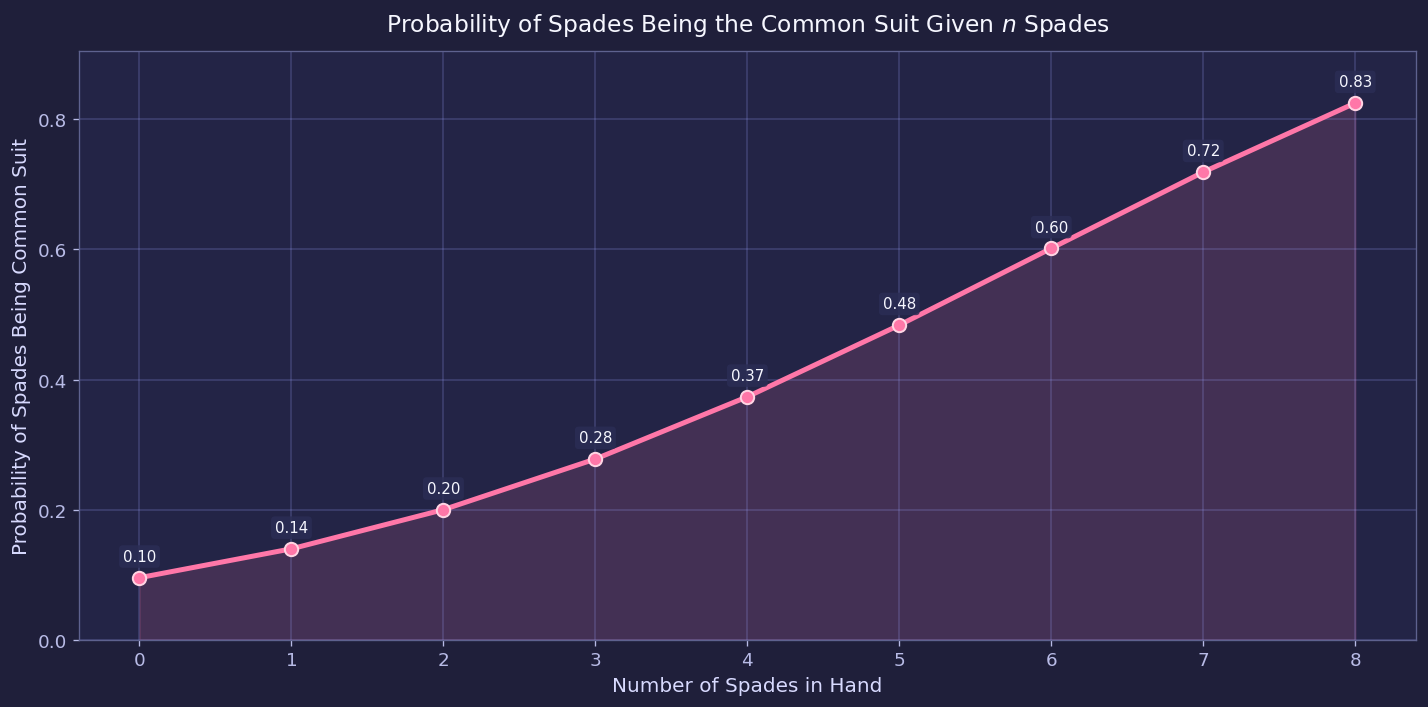

In [30]:
SPADES_OBSERVATIONS = range(0,9)

probabilities = compute_probabilities_range(SPADES_OBSERVATIONS)
plot_probabilities_range(probabilities, r"Probability of Spades Being the Common Suit Given $n$ Spades", "Number of Spades in Hand", "Probability of Spades Being Common Suit")

## Two Suits with Information
What about the case where we have 7 Spades and 3 Hearts? Or 6 Spades and 2 Hearts? How does this change our probability? 

In [31]:
# This probability only works if the other suit being observed is not the potential target suit (I.E. Can't test for Spades and Clubs, since that would require a different model)

def compute_multi_card_range(suit_observation, other_suit_observations):
    r = {}
    for observation in other_suit_observations:
        # Number of total hands
        total_hands = math.comb(TOTAL_CARDS, COMMON_CARDS)
        remaining_hand = HAND - observation - suit_observation

        # Number of ways to get n Spades and x Hearts, assuming Spades is the common suit
        # (Comb common 12 suit) * (Comb other 10 suit) * (Comb rest of hand)
        ways_n_spades_common_x_hearts_10 = math.comb(COMMON_CARDS, suit_observation) * math.comb(10, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is the common suit
        # (Comb common 12 suit) * (Comb other 8 suit) * (Comb rest of hand)
        ways_n_spades_common_x_hearts_8 = math.comb(COMMON_CARDS, suit_observation) * math.comb(8, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 8, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not common suit
        # (Comb 10 suit) * (Comb other 10 suit) * (Comb rest of hand)
        ways_n_spades_10_x_hearts_10 = math.comb(10, suit_observation) * math.comb(10, observation) * math.comb(CARDS_REMAINING - 10 - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not common suit
        # (Comb 8 suit) * (Comb other 10 suit) * (Comb rest of hand)
        ways_n_spades_8_x_hearts_10 = math.comb(8, suit_observation) * math.comb(10, observation) * math.comb(CARDS_REMAINING - 8 - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not common suit
        # (Comb 10 suit) * (Comb other 8 suit) * (Comb rest of hand)
        ways_n_spades_10_x_hearts_8 = math.comb(10, suit_observation) * math.comb(8, observation) * math.comb(CARDS_REMAINING - 10 - 8, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not the common suit
        # (Comb 10 suit) * (Comb other common 12 suit) * (Comb rest of hand)
        ways_n_spades_10_common_x_hearts = math.comb(10, suit_observation) * math.comb(COMMON_CARDS, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not the common suit
        # (Comb 8 suit) * (Comb other common 12 suit) * (Comb rest of hand)
        ways_n_spades_8_common_x_hearts = math.comb(8, suit_observation) * math.comb(COMMON_CARDS, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 8, remaining_hand)



        # Probability of n Spades and x Hearts given Spades is common suit
        prob_n_spades_common_x_hearts = (ways_n_spades_common_x_hearts_10 * 2/3 + ways_n_spades_common_x_hearts_8 * 1/3) / total_hands
        # Probability of n Spades and x Hearts given both Spades and Hearts are not common suit
        prob_n_spades_x_hearts_both_not_common = (ways_n_spades_10_x_hearts_10 + ways_n_spades_10_x_hearts_8 + ways_n_spades_8_x_hearts_10) * (1/3) / total_hands
        # Probability of n Spades and x Hearts given Spades is not common suit
        prob_n_spades_x_hearts_spades_not_common = (ways_n_spades_10_common_x_hearts * 2/3 + ways_n_spades_8_common_x_hearts * 1/3) / total_hands

        # Probability of n Spades and x Hearts
        prob_n_spades_x_hearts = prob_n_spades_common_x_hearts * 0.25 + prob_n_spades_x_hearts_both_not_common * 0.5 + prob_n_spades_x_hearts_spades_not_common * 0.25

        prob_spades_common_given_n_spades_x_hearts = prob_n_spades_common_x_hearts * PROBABILITY_COMMON / prob_n_spades_x_hearts



        r[observation] = round(prob_spades_common_given_n_spades_x_hearts, 4)
    
    return r


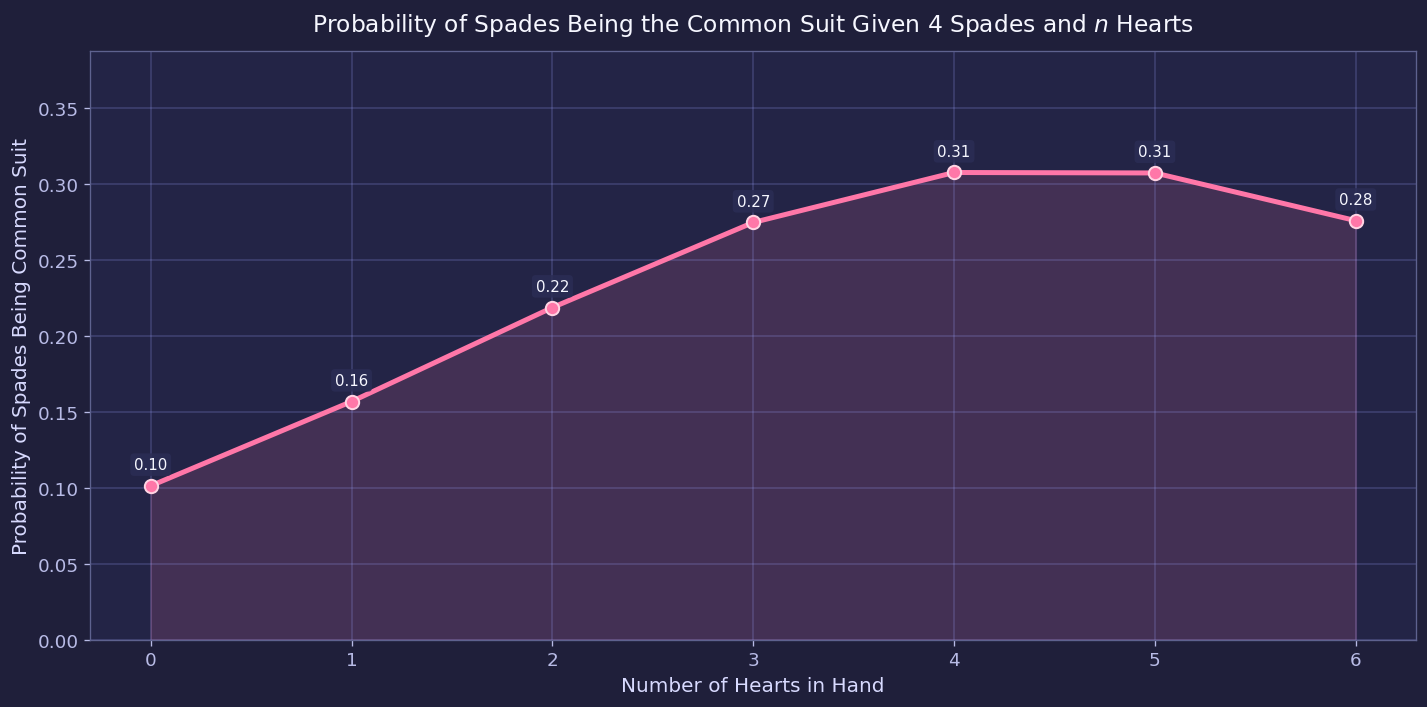

In [32]:
SPADES_OBSERVATIONS = 4
Hearts_OBSERVATIONS = range(0, HAND - SPADES_OBSERVATIONS + 1)

probabilities = compute_multi_card_range(SPADES_OBSERVATIONS, Hearts_OBSERVATIONS)
plot_probabilities_range(probabilities, fr"Probability of Spades Being the Common Suit Given {SPADES_OBSERVATIONS} Spades and $n$ Hearts", "Number of Hearts in Hand", "Probability of Spades Being Common Suit")